In [49]:
import os
import glob
import time
import json

import networkx as nx
import math

## Setup Plot Settings

In [51]:
import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)


from matplotlib.font_manager import FontProperties

panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

# Data Paths

In [52]:
data_path = "/DATA/7A/assets/erc20tokens/Minds/"

graph_name = "Minds"

In [53]:
with open(data_path + graph_name + '.json') as f:
    graph_info = json.load(f)
graph_info['name'], graph_info['#nodes'], graph_info['#edges']

('Minds', 4671, 26190)

# Create NetworkX Graph

In [54]:
#create multidigraph
edges = graph_info["edges"]

graph = nx.MultiDiGraph()
for e in edges:
    u = e[0]
    v = e[1]
    t = e[2]
    graph.add_edge(u, v, timestamp=t)

nx.info(graph)

'Name: \nType: MultiDiGraph\nNumber of nodes: 4671\nNumber of edges: 26190\nAverage in degree:   5.6069\nAverage out degree:   5.6069'

## create network snapshots

In [55]:
time_period = 60*60*24*90 # 90 day periods

mindelta = edges[0][2]
maxdelta = edges[0][2]
for e in edges:
    if e[2] > maxdelta:
        maxdelta = e[2]
    if e[2] < mindelta:
        mindelta = e[2]
print(mindelta, maxdelta)
duration = maxdelta - mindelta
num_snapshots = math.ceil(duration / time_period)
print("Number of snapshots", num_snapshots)

graphs = []
for x in range(0,num_snapshots):
    tg = nx.DiGraph()
    #tg["name"] = str(x)
    graphs.append(nx.DiGraph())
    

for u,v,t in graph.edges(data=True):
    idx = math.floor((t["timestamp"] - mindelta) / time_period)
    graphs[idx].add_edge(u, v)
    
for g in graphs:
    print(nx.info(g))

1533124251 1615234132
Number of snapshots 11
Name: 
Type: DiGraph
Number of nodes: 2023
Number of edges: 2462
Average in degree:   1.2170
Average out degree:   1.2170
Name: 
Type: DiGraph
Number of nodes: 442
Number of edges: 689
Average in degree:   1.5588
Average out degree:   1.5588
Name: 
Type: DiGraph
Number of nodes: 531
Number of edges: 873
Average in degree:   1.6441
Average out degree:   1.6441
Name: 
Type: DiGraph
Number of nodes: 514
Number of edges: 806
Average in degree:   1.5681
Average out degree:   1.5681
Name: 
Type: DiGraph
Number of nodes: 489
Number of edges: 660
Average in degree:   1.3497
Average out degree:   1.3497
Name: 
Type: DiGraph
Number of nodes: 281
Number of edges: 390
Average in degree:   1.3879
Average out degree:   1.3879
Name: 
Type: DiGraph
Number of nodes: 290
Number of edges: 451
Average in degree:   1.5552
Average out degree:   1.5552
Name: 
Type: DiGraph
Number of nodes: 715
Number of edges: 1296
Average in degree:   1.8126
Average out degree:  

# Analysis

In [56]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import powerlaw

## hub vertices

- which tokens share hubs? (if they share any)

- can we find liquidity providers by checking neighbors of hub vertices?


In [57]:
degrees = graph.degree
print("All time:")
print(sorted(degrees, key=lambda t: t[1], reverse=True)[:5])
c = 0
for g in graphs:
    print("T =", c)
    c += 1
    print(sorted(g.degree, key=lambda t: t[1], reverse=True)[:5])

All time:
[('0x112ca67c8e9a6ac65e1a2753613d37b89ab7436b', 14300), ('0x0ce13e66bef17801c9f19fb763be2dd2f391d7c2', 2049), ('0x461f1c5768cdb7e567a84e22b19db0eaba069bad', 1541), ('0x1820ffad63fd64d7077da4355e9641dfff4dad0d', 1465), ('0x6f2548b1bee178a49c8ea09be6845f6aeaf3e8da', 1267)]
T = 0
[('0x461f1c5768cdb7e567a84e22b19db0eaba069bad', 1465), ('0x1820ffad63fd64d7077da4355e9641dfff4dad0d', 356), ('0x14e421986c5ff2951979987cdd82fa3c0637d569', 162), ('0x112ca67c8e9a6ac65e1a2753613d37b89ab7436b', 155), ('0x2ca275d27726ff7fa3c4ad402f21f2b9936fcc81', 59)]
T = 1
[('0x1820ffad63fd64d7077da4355e9641dfff4dad0d', 177), ('0x112ca67c8e9a6ac65e1a2753613d37b89ab7436b', 146), ('0x14e421986c5ff2951979987cdd82fa3c0637d569', 86), ('0x6f2548b1bee178a49c8ea09be6845f6aeaf3e8da', 53), ('0x8d12a197cb00d4747a1fe03395095ce2a5cc6819', 48)]
T = 2
[('0x1820ffad63fd64d7077da4355e9641dfff4dad0d', 258), ('0x112ca67c8e9a6ac65e1a2753613d37b89ab7436b', 227), ('0x6f2548b1bee178a49c8ea09be6845f6aeaf3e8da', 83), ('0x14e42198

## degree distribution

- is there a difference between erc20 and erc721 degree distributions?
- user profiling => degree distribution of users across graphs 
- user activity profiling => temporal degree distribution 
    - for diffent time granularities

Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...


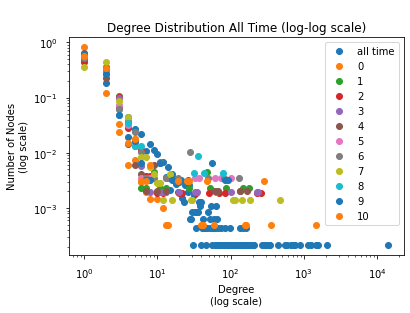

In [58]:
def plot_degree_histogram(g, normalized=True):
    print("Creating histogram...")
    aux_y = nx.degree_histogram(g)
    
    aux_x = np.arange(0,len(aux_y)).tolist()
    
    n_nodes = g.number_of_nodes()
    
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y

x, y = plot_degree_histogram(graph)
plt.title('\nDegree Distribution All Time (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(x, y, 'o', label = "all time")

c = 0
for g in graphs:
    x, y = plot_degree_histogram(g)
    plt.plot(x, y, 'o', label=c)
    c += 1
plt.legend()

- degree distribution could show us whales in marketplaces?
- nft galleries? :)
    
**Degree distribution at a **

- degree distribution change 

# pdf

powerlaw package
fit a power law curve
how th exponent is changing over time

* cdf of the data

In [60]:
degrees = graph.degree
data = [i[1] for i in degrees]
fit = powerlaw.Fit(data)
fit.power_law.alpha
fit.power_law.sigma
fit.distribution_compare('power_law', 'exponential')

Calculating best minimal value for power law fit
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /


(336.1183154916521, 0.0020699276971334287)

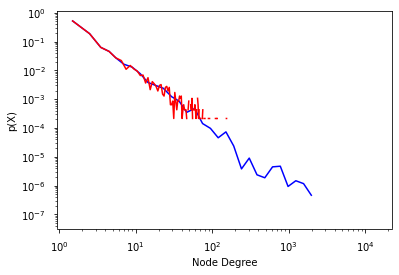

In [62]:
figPDF = powerlaw.plot_pdf(data, color='b')
powerlaw.plot_pdf(data, linear_bins=True, color='r', ax=figPDF)

figPDF.set_ylabel("p(X)")
figPDF.set_xlabel(r"Degree Frequency")
figname = 'Degree Distribution'

In [73]:
def plot_basics(data, data_inst, fig, units):
    from powerlaw import plot_pdf, Fit, pdf
    annotate_coord = (-.4, .95)
    ax1 = fig.add_subplot(n_graphs,n_data,data_inst)
    x, y = pdf(data, linear_bins=True)
    ind = y>0
    y = y[ind]
    x = x[:-1]
    x = x[ind]
    ax1.scatter(x, y, color='r', s=.5)
    #plot_pdf(data[data>0], ax=ax1, color='b', linewidth=2)
    plot_pdf(data, ax=ax1, color='b', linewidth=2)
    from pylab import setp
    setp( ax1.get_xticklabels(), visible=False)

    if data_inst==1:
        ax1.annotate("A", annotate_coord, xycoords="axes fraction", fontproperties=panel_label_font)

    
    from mpl_toolkits.axes_grid.inset_locator import inset_axes
    ax1in = inset_axes(ax1, width = "30%", height = "30%", loc=3)
    ax1in.set_xticks([])
    ax1in.set_yticks([])

    
    ax2 = fig.add_subplot(n_graphs,n_data,n_data+data_inst, sharex=ax1)
    plot_pdf(data, ax=ax2, color='b', linewidth=2)
    fit = Fit(data, xmin=1, discrete=True)
    fit.power_law.plot_pdf(ax=ax2, linestyle=':', color='g')
    p = fit.power_law.pdf()

    ax2.set_xlim(ax1.get_xlim())
    
    fit = Fit(data, discrete=True)
    fit.power_law.plot_pdf(ax=ax2, linestyle='--', color='g')
    from pylab import setp
    setp( ax2.get_xticklabels(), visible=False)

    if data_inst==1:
       ax2.annotate("B", annotate_coord, xycoords="axes fraction", fontproperties=panel_label_font)        
       ax2.set_ylabel(u"p(X)")# (10^n)")
        
    ax3 = fig.add_subplot(n_graphs,n_data,n_data*2+data_inst)#, sharex=ax1)#, sharey=ax2)
    fit.power_law.plot_pdf(ax=ax3, linestyle='--', color='g')
    fit.exponential.plot_pdf(ax=ax3, linestyle='--', color='r')
    fit.plot_pdf(ax=ax3, color='b', linewidth=2)
    
    ax3.set_ylim(ax2.get_ylim())
    ax3.set_xlim(ax1.get_xlim())
    
    if data_inst==1:
        ax3.annotate("C", annotate_coord, xycoords="axes fraction", fontproperties=panel_label_font)

    ax3.set_xlabel(units)

/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in t

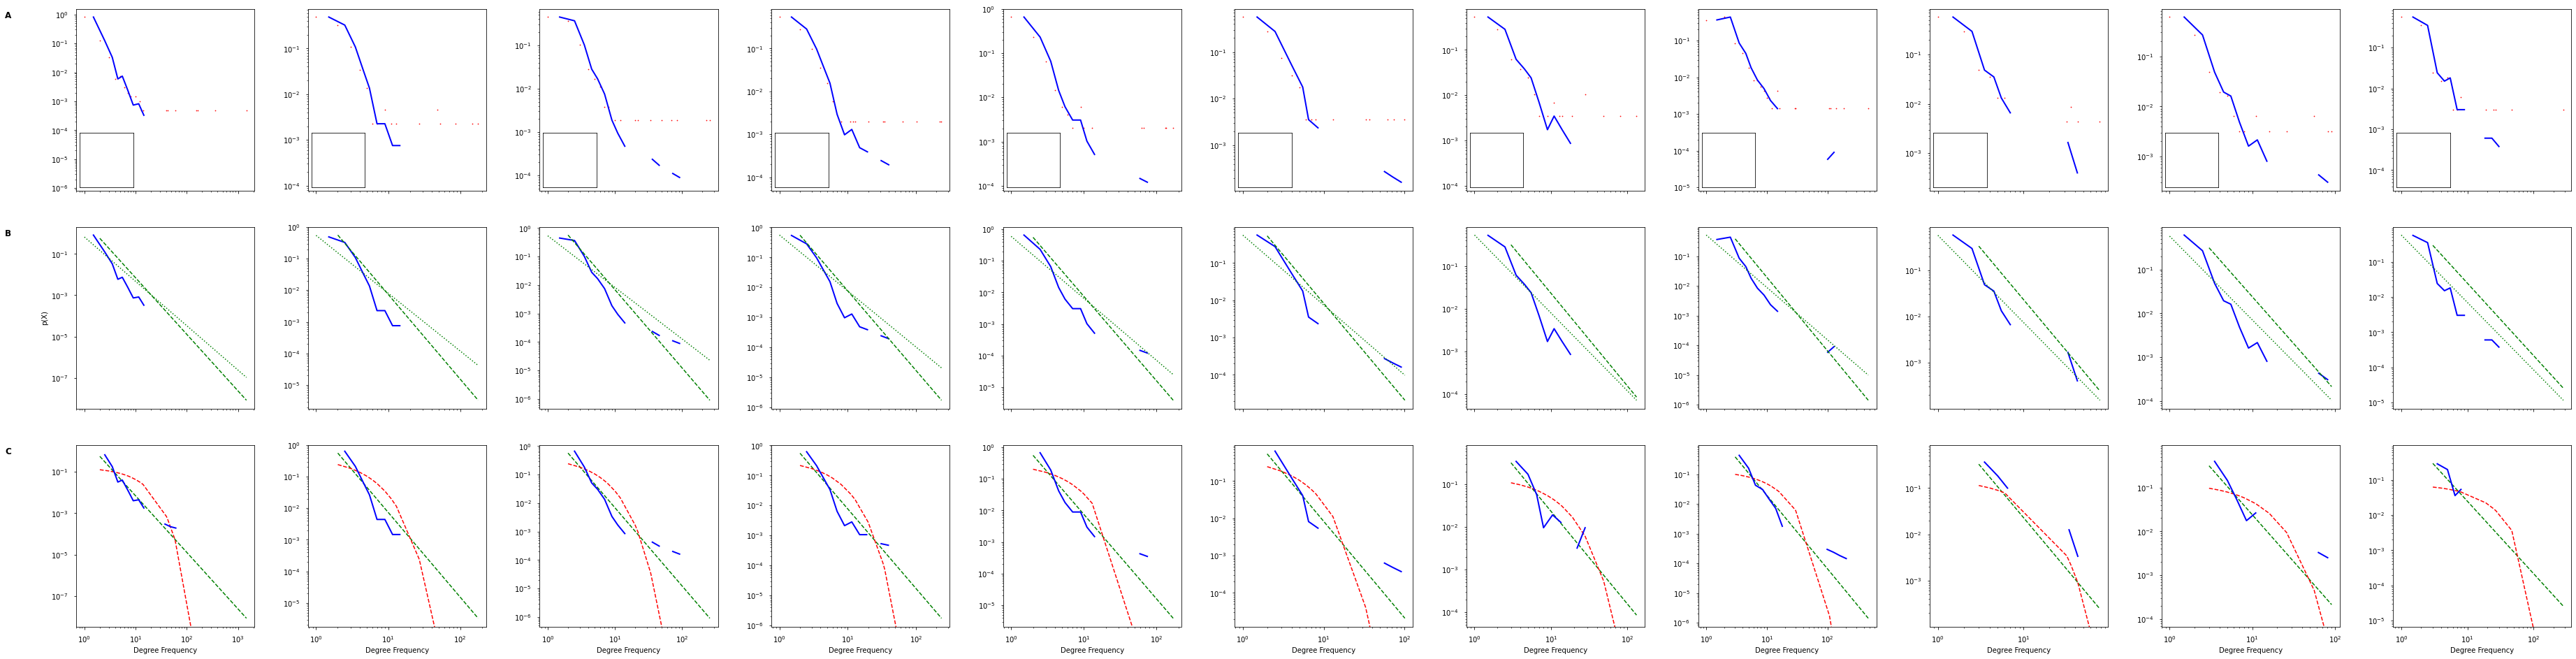

In [76]:
n_data = len(graphs)
n_graphs = 4
f = plt.figure(figsize=(64,22))

data_inst = 1
for g in graphs:
    degrees = g.degree
    data = [i[1] for i in degrees]
    units = 'Degree Frequency'
    plot_basics(data, data_inst, f, units)
    data_inst += 1 

f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.2)
figname = 'FigWorkflow'
f.savefig(figname+'.png', bbox_inches='tight')
#f.savefig(figname+'.tiff', bbox_inches='tight', dpi=300)